# Project_ES290
Pojeto de localização de dispositivos móveis da disciplina Comunicações Móveis (ES290) - UFPE 2024.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from folium.plugins import HeatMap

In [2]:
df_bts = pd.read_csv('../../input_data/02_pre_processed_files/bts.csv')
df_test_alunos = pd.read_csv('../../input_data/02_pre_processed_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('../../input_data/02_pre_processed_files/meds_train_alunos.csv')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [4]:
df_train_alunos = df_train_alunos.loc[:, ~df_train_alunos.columns.str.contains('^Unnamed')]
df_train_alunos

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,True
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,False
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6759,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6760,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6761,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True


In [5]:
df_test_alunos = df_test_alunos.loc[:, ~df_test_alunos.columns.str.contains('^Unnamed')]
df_test_alunos

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3
0,0,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
1,3,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
2,8,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-86.090000,-115.0000,5.0,3.0,2.0
3,10,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
4,12,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,9672,-78.377143,-93.530000,-74.481429,-89.900000,-94.2075,-85.220000,-89.576667,-103.704000,-97.2200,1.0,4.0,4.0
2900,9674,-79.580000,-84.140000,-74.481429,-95.280000,-94.1450,-93.030000,-89.576667,-103.704000,-97.5000,1.0,4.0,4.0
2901,9675,-77.652857,-101.310000,-79.640000,-93.238333,-99.8000,-93.584286,-86.680000,-103.704000,-96.3650,1.0,4.0,4.0
2902,9677,-77.367143,-89.474286,-79.270000,-97.160000,-98.4800,-94.844286,-87.783333,-103.704000,-94.3275,1.0,4.0,5.0


In [6]:
df_bts = df_bts.loc[:, ~df_bts.columns.str.contains('^Unnamed')]
df_bts

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952000,873,0,rssi_1_1
1,1,BTS_1_2,PEMDL01_2,-8.04342,-34.952000,872,120,rssi_1_2
2,1,BTS_1_3,PEMDL01_3,-8.04342,-34.952000,875,240,rssi_1_3
3,2,BTS_2_1,PEMDL08_1,-8.05289,-34.944672,865,0,rssi_2_1
4,2,BTS_2_2,PEMDL08_2,-8.05289,-34.944672,874,120,rssi_2_2
5,2,BTS_2_3,PEMDL08_3,-8.05289,-34.944672,871,240,rssi_2_3
6,3,BTS_3_1,PEMDL09_1,-8.05532,-34.957900,877,0,rssi_3_1
7,3,BTS_3_2,PEMDL09_2,-8.05532,-34.957900,881,120,rssi_3_2
8,3,BTS_3_3,PEMDL09_3,-8.05532,-34.957900,869,240,rssi_3_3


In [7]:
X = df_train_alunos.drop(columns=['lat', 'lon', 'indoor'])
y_lat = df_train_alunos['lat']
y_lon = df_train_alunos['lon']
y_indoor = df_train_alunos['indoor']

X_test = df_test_alunos

In [8]:
X_train, X_val, y_lat_train, y_lat_val, y_lon_train, y_lon_val, y_indoor_train, y_indoor_val = train_test_split(
    X, y_lat, y_lon, y_indoor, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
lat_model = XGBRegressor()
lon_model = XGBRegressor()

lat_model.fit(X_train_scaled, y_lat_train)
lon_model.fit(X_train_scaled, y_lon_train)

y_lat_pred = lat_model.predict(X_val_scaled)
y_lon_pred = lon_model.predict(X_val_scaled)

print("Latitude MSE:", mean_squared_error(y_lat_val, y_lat_pred))
print("Longitude MSE:", mean_squared_error(y_lon_val, y_lon_pred))

Latitude MSE: 7.516936280227477e-09
Longitude MSE: 2.116743799326382e-08


In [11]:
indoor_model = XGBClassifier()

indoor_model.fit(X_train_scaled, y_indoor_train)
y_indoor_pred = indoor_model.predict(X_val_scaled)

print("Indoors/Outdoors Accuracy:", accuracy_score(y_indoor_val, y_indoor_pred))

Indoors/Outdoors Accuracy: 1.0


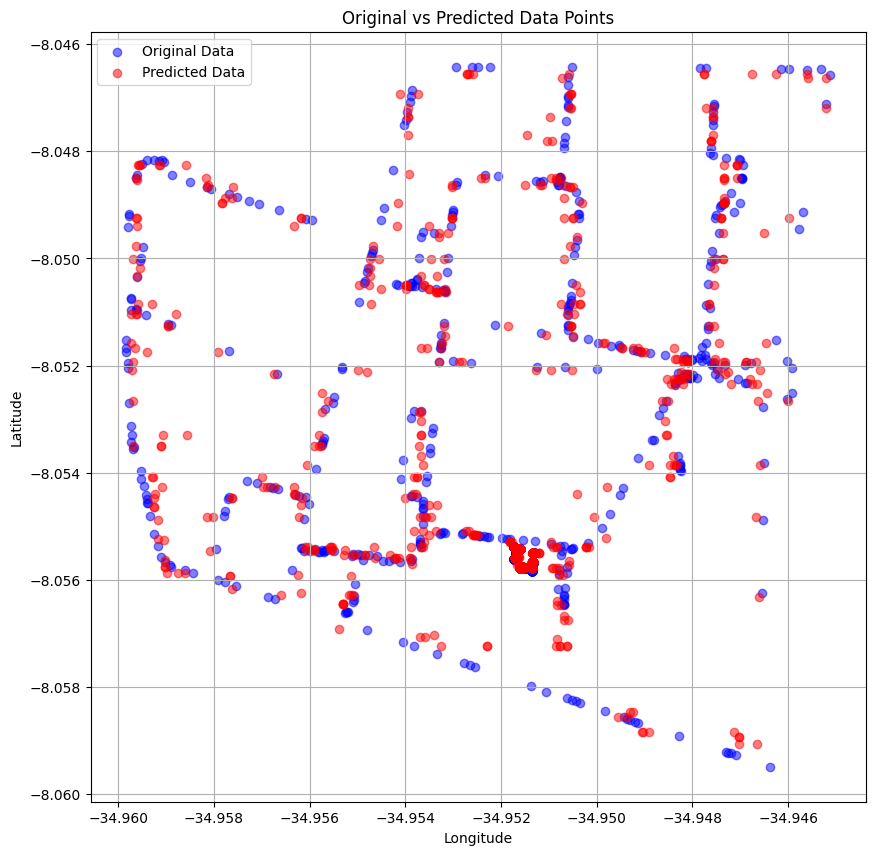

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(y_lon_val, y_lat_val, color='blue', label='Original Data', alpha=0.5)

plt.scatter(y_lon_pred, y_lat_pred, color='red', label='Predicted Data', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Data Points')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
test_lat_pred = lat_model.predict(X_test_scaled)
test_lon_pred = lon_model.predict(X_test_scaled)
test_indoor_pred = indoor_model.predict(X_test_scaled)

df_test_alunos['predicted_lat'] = test_lat_pred
df_test_alunos['predicted_lon'] = test_lon_pred
df_test_alunos['predicted_indoor'] = test_indoor_pred

df_test_alunos.to_csv('../../output_data/predictions_xgr.csv', index=False)

In [14]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371000
    return c * r

In [15]:
distances = haversine(y_lat_val, y_lon_val, y_lat_pred, y_lon_pred)

In [16]:
mean_distance = np.mean(distances)
max_distance = np.max(distances)
min_distance = np.min(distances)
std_distance = np.std(distances)

print(f"Mean Distance: {mean_distance:.2f} meters")
print(f"Max Distance: {max_distance:.2f} meters")
print(f"Min Distance: {min_distance:.2f} meters")
print(f"Standard Deviation of Distance: {std_distance:.2f} meters")
distances.describe()


Mean Distance: 10.37 meters
Max Distance: 128.22 meters
Min Distance: 0.50 meters
Standard Deviation of Distance: 15.55 meters


count    1353.000000
mean       10.368277
std        15.555847
min         0.496893
25%         2.475052
50%         4.159828
75%        10.701917
max       128.219201
dtype: float64

<Axes: >

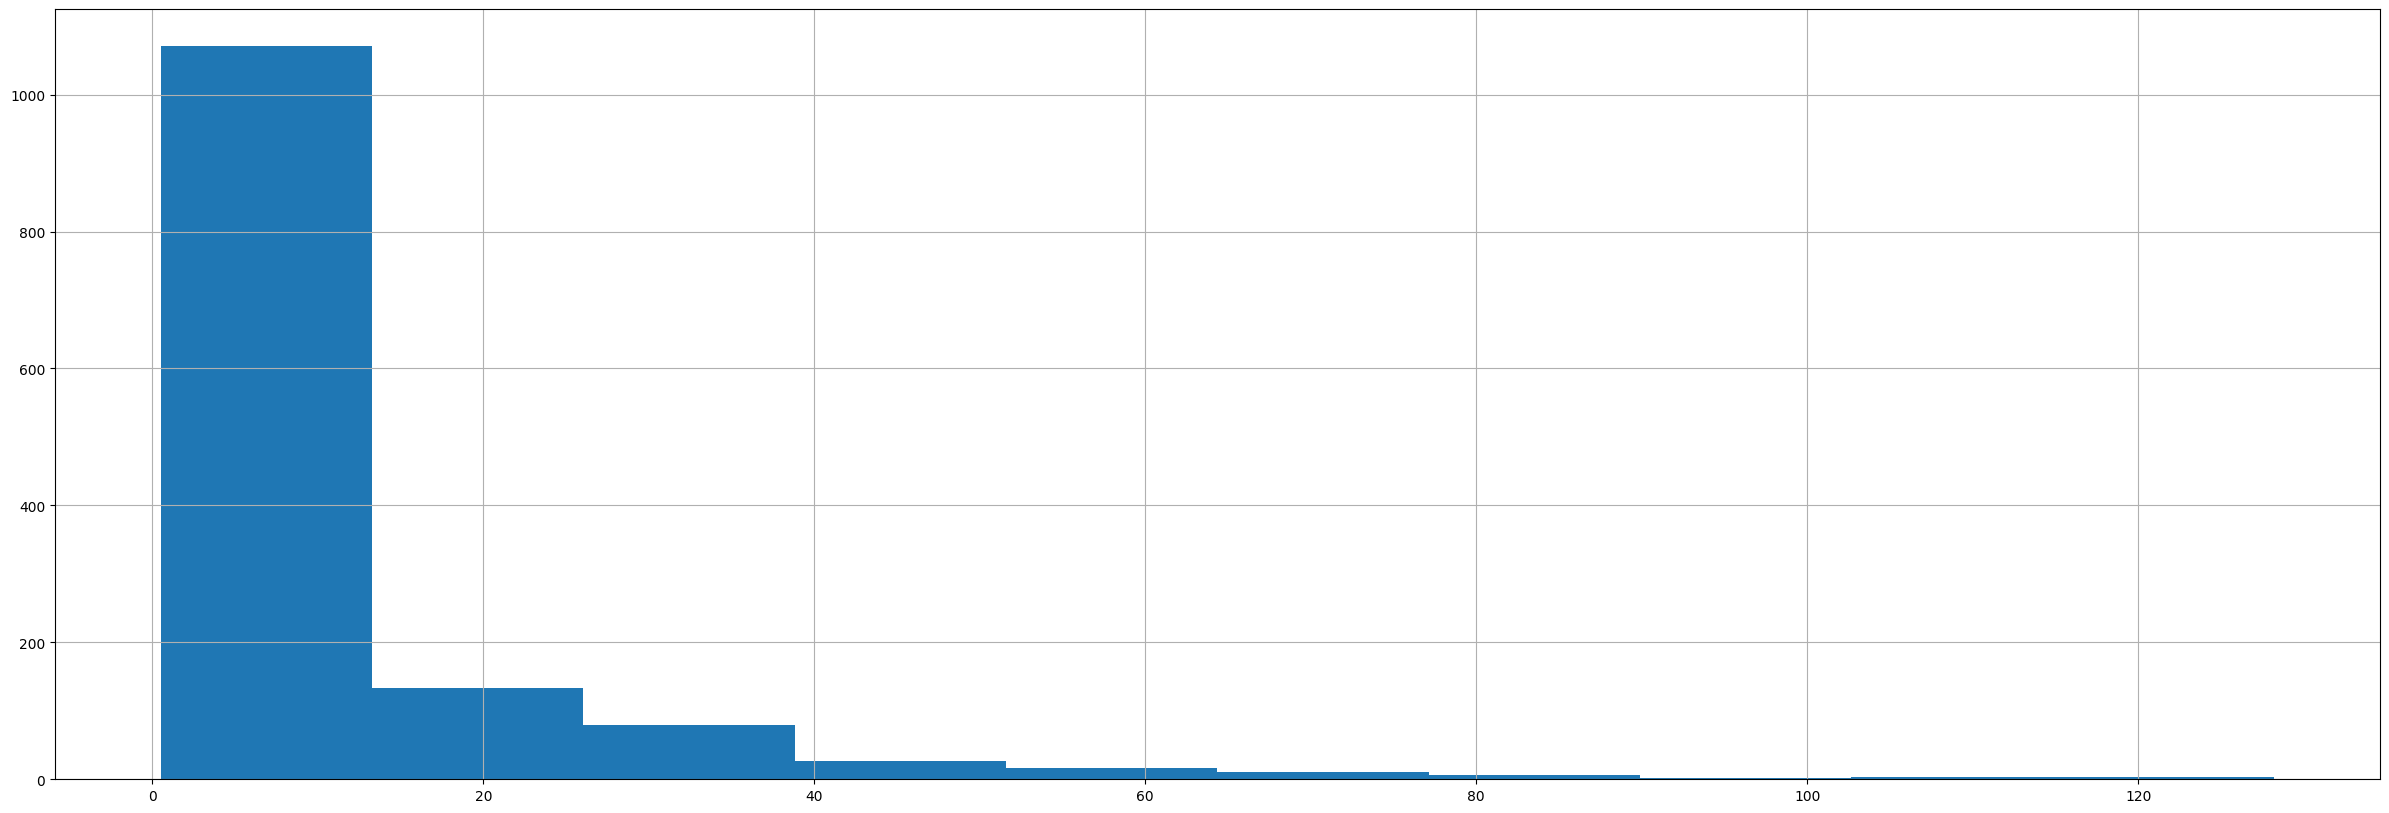

In [17]:
distances.hist(bins=10, figsize=(30,10))

<Axes: >

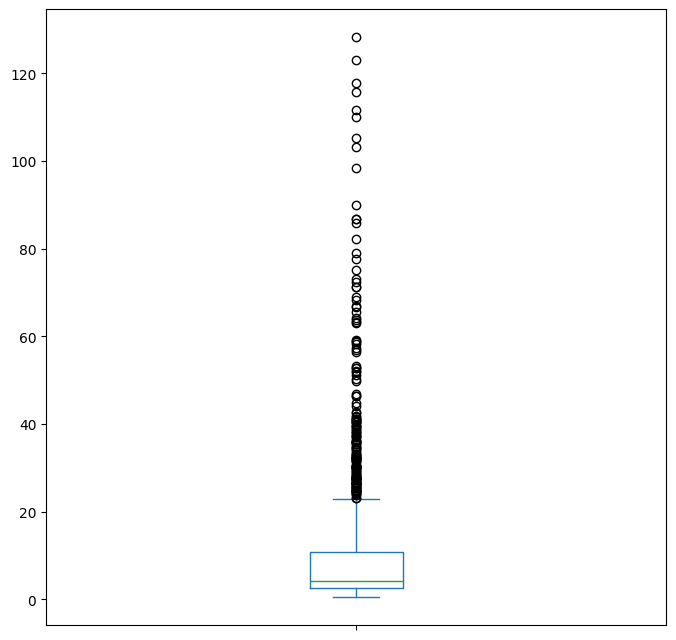

In [21]:
distances.plot(kind='box', figsize=(8,8))